In [1]:
import xml.etree.ElementTree as ET
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Execution times analysis

## Parsing and aggregation
We first parse the execution times for Micro and TPC-H queries in the XML report.

In [2]:
tree = ET.parse('TEST-ch.epfl.dias.cs422.QueryTest.xml')
print(tree)

In [3]:
root = tree.getroot()[1:-2]

In [4]:
for child in root[:10]:
    print(child.tag, child.attrib)

testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '2.224'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '0.06'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():2', 'time': '0.034'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():3', 'time': '0.037'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():4', 'time': '0.158'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():5', 'time': '0.074'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():6', 'time': '0.029'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():7', 'time': '0.016'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():8', 'time': '0.015'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():9', 'time': '0.015'}


In [5]:
tests = ["volcano (row store)", "operator-at-a-time (row store)","block-at-a-time (row store)", 
"late-operator-at-a-time (row store)","volcano (column store)",
"operator-at-a-time (column store)",
"block-at-a-time (column store)",
"late-operator-at-a-time (column store)", 
"volcano (pax store)", "operator-at-a-time (pax store)",
"block-at-a-time (pax store)",
"late-operator-at-a-time (pax store)" ]

In [6]:
groups = zip(*[iter(root)]*3)

In [7]:
data = {}
for idx,test in enumerate(tests):
    data[test] = root[45*idx: (idx + 1)*45]

We associate the list of tests with the correct execution times.

In [8]:
print(data[tests[0]][0].attrib['time'])
bars = {}
limit = 12
count = 0
for k,v in data.items():
    if count < limit:
        tmp = []
        for stat in v:
            tmp.append(float(stat.attrib['time']))
        bars[k] = tmp
        count += 1


2.224


In [9]:
block = "block-at-a-time"
volcano = "volcano"
operator = "operator-at-a-time"
late ="late"
models = [volcano, operator, block, late]


We group the execution times by execution models and type of queries

In [10]:
def byModel(bars, start=0, end=45):

    groupedByModel = {}
    for m in models:
        groupedByModel[m] = {}
    for name, times in bars.items():
        for model in models:
            if name.startswith(model):
                groupedByModel[model][name] = times[start:end]
    return groupedByModel

In [11]:
tcph = byModel(bars, 35, 45)
micro = byModel(bars,1,35)
tcph

{'volcano': {'volcano (row store)': [0.118,
   0.405,
   0.286,
   0.181,
   0.039,
   0.113,
   0.165,
   0.111,
   0.11,
   0.108],
  'volcano (column store)': [0.06,
   0.132,
   0.149,
   0.132,
   0.037,
   0.068,
   0.1,
   0.088,
   0.082,
   0.074],
  'volcano (pax store)': [0.062,
   0.114,
   0.153,
   0.127,
   0.035,
   0.07,
   0.1,
   0.083,
   0.076,
   0.07]},
 'operator-at-a-time': {'operator-at-a-time (row store)': [0.16,
   0.162,
   0.228,
   0.292,
   0.077,
   0.182,
   0.215,
   0.153,
   0.185,
   0.151],
  'operator-at-a-time (column store)': [0.126,
   0.116,
   0.172,
   0.191,
   0.041,
   0.112,
   0.127,
   0.081,
   0.092,
   0.093],
  'operator-at-a-time (pax store)': [0.12,
   0.101,
   0.2,
   0.205,
   0.053,
   0.131,
   0.146,
   0.111,
   0.127,
   0.112]},
 'block-at-a-time': {'block-at-a-time (row store)': [0.08,
   0.158,
   0.201,
   0.135,
   0.033,
   0.088,
   0.088,
   0.067,
   0.075,
   0.07],
  'block-at-a-time (column store)': [0.053,
 

# Visualization
We plot bar charts of execution times for all execution models under different data layout 

In [25]:
def plot(bars, n, title):
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    barWidth = 0.25
    #p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    #p2 = plt.bar(ind, womenMeans, width,
                 #bottom=menMeans, yerr=womenStd)
    ps = []
    r=ind
    plt.figure(figsize=(10,5))
    for name, times in bars.items():
        ps.append(plt.bar(r, times, barWidth))
        r = [x + barWidth for x in r]
    plt.ylabel('Execution Time (s)')

    plt.title(title)
    #plt.xticks(ind, tuple([str(i) for i in range(n)]))
    plt.xticks([y + barWidth for y in range(n)], tuple([str(i) for i in range(n)]))
    plt.xlabel('query #')

    #plt.yticks(np.linspace(0, 0.1 , 10))
    plt.legend(tuple(ps), tuple(bars.keys()))
    plt.show()

In [23]:
models

['volcano', 'operator-at-a-time', 'block-at-a-time', 'late']

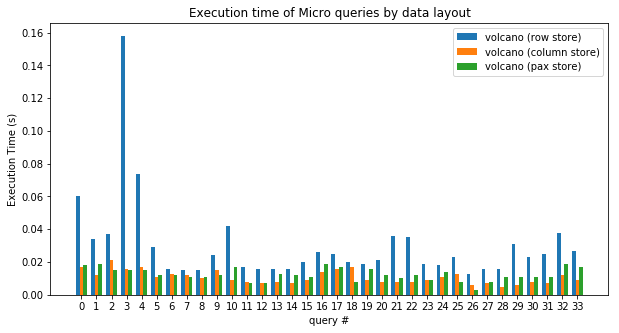

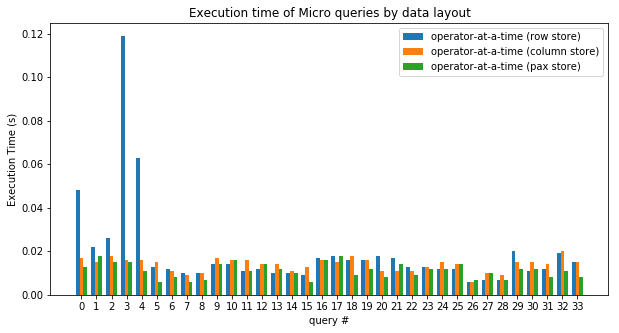

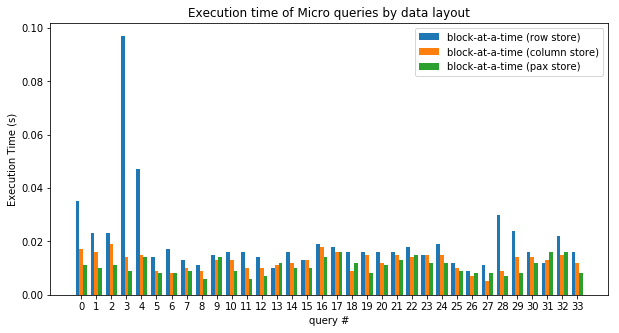

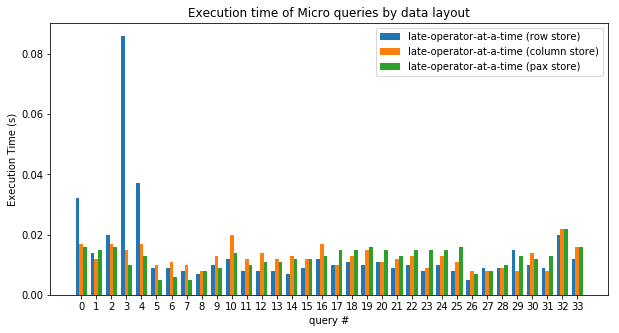

In [24]:
for model in models:
    plot(micro[model], 34, "Execution time of Micro queries by data layout")

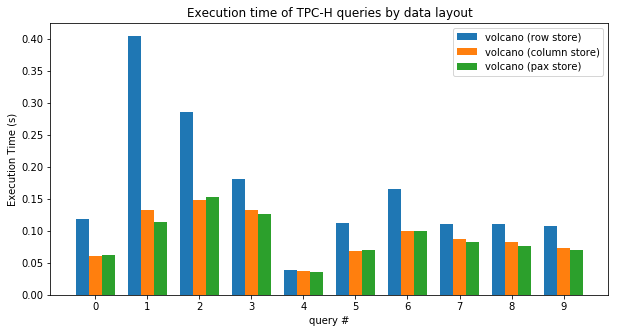

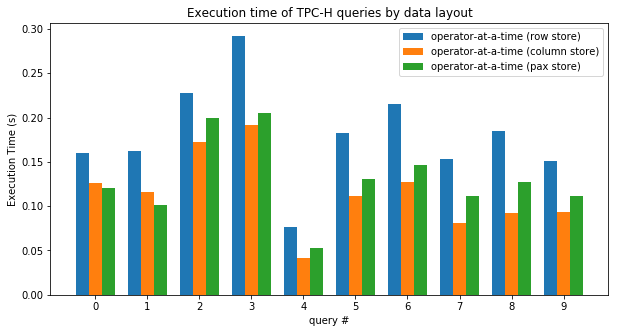

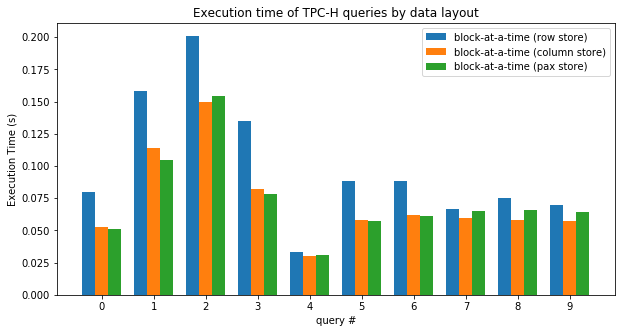

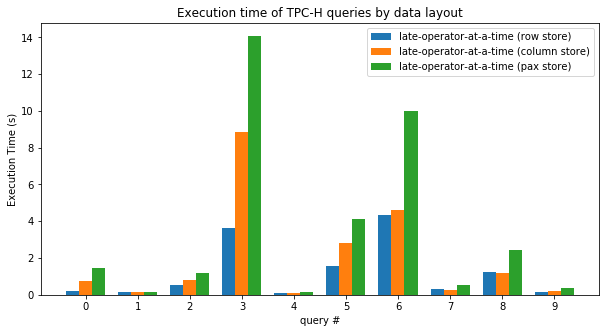

In [26]:
for model in models:
    plot(tcph[model], 10, "Execution time of TPC-H queries by data layout")

We select the best data layout in each execution model and compare the execution times

In [16]:
def bestLayouts(results, qtype):
    bests = {}

    for model, layouts in results.items():
        sum = float('inf')
        #print(layouts)
        for layout, times in layouts.items():
            if np.sum(times) < sum:
                sum = np.sum(times)
                bests[model] ={layout: times, 'time': sum}
    cleanUp = {}
    if qtype == 'micro':
        qnames = ['Micro q' + str(i) for i in range(35)]
    elif qtype == 'tpch':
        qnames = ['TPC-H q01', 'TPC-H q02', 'TPC-H q03','TPC-H q04','TPC-H q05', 'TPC-H q06','TPC-H q07','TPC-H q09', 'TPC-H q17','TPC-H q18','TPC-H q19']
    print(bests)
    for name,v in bests.items():
        zippedTimes = zip(qnames, list(v.values())[0])
        model_layout = list(v.keys())[0]
        cleanUp[model_layout] = {}
        for (qname, time) in zippedTimes:
            cleanUp[model_layout][qname] = time
        cleanUp[model_layout]['Total time (s)'] = list(v.values())[1]
        cleanUp[model_layout]['Average time (s)'] = np.mean(list(v.values())[0] )
        cleanUp[model_layout]['Standard deviation (s)'] = np.std(list(v.values())[0] )


    return cleanUp
bestsMicro = bestLayouts(micro, 'micro')
bestsTPCH = bestLayouts(tcph, 'tpch')


{'volcano': {'volcano (column store)': [0.017, 0.012, 0.021, 0.016, 0.017, 0.011, 0.013, 0.012, 0.01, 0.015, 0.009, 0.008, 0.007, 0.008, 0.007, 0.009, 0.014, 0.016, 0.017, 0.009, 0.008, 0.008, 0.008, 0.009, 0.011, 0.013, 0.006, 0.007, 0.005, 0.006, 0.008, 0.007, 0.012, 0.009], 'time': 0.36500000000000005}, 'operator-at-a-time': {'operator-at-a-time (pax store)': [0.013, 0.018, 0.015, 0.015, 0.011, 0.006, 0.008, 0.006, 0.007, 0.014, 0.016, 0.011, 0.014, 0.012, 0.01, 0.006, 0.016, 0.018, 0.009, 0.012, 0.008, 0.014, 0.009, 0.012, 0.012, 0.014, 0.007, 0.01, 0.007, 0.012, 0.012, 0.008, 0.011, 0.008], 'time': 0.381}, 'block-at-a-time': {'block-at-a-time (pax store)': [0.011, 0.01, 0.011, 0.009, 0.014, 0.008, 0.008, 0.009, 0.006, 0.014, 0.009, 0.006, 0.007, 0.012, 0.01, 0.01, 0.014, 0.016, 0.012, 0.008, 0.011, 0.013, 0.015, 0.012, 0.012, 0.009, 0.008, 0.008, 0.007, 0.008, 0.012, 0.016, 0.016, 0.008], 'time': 0.359}, 'late': {'late-operator-at-a-time (pax store)': [0.016, 0.015, 0.016, 0.01, 0

In [27]:
pd.DataFrame(bestsMicro)

,volcano (column store),operator-at-a-time (pax store),block-at-a-time (pax store),late-operator-at-a-time (pax store)
Micro q0,0.017000,0.013000,0.011000,0.016000
Micro q1,0.012000,0.018000,0.010000,0.015000
Micro q2,0.021000,0.015000,0.011000,0.016000
Micro q3,0.016000,0.015000,0.009000,0.010000
Micro q4,0.017000,0.011000,0.014000,0.013000
Micro q5,0.011000,0.006000,0.008000,0.005000
Micro q6,0.013000,0.008000,0.008000,0.006000
Micro q7,0.012000,0.006000,0.009000,0.005000
Micro q8,0.010000,0.007000,0.006000,0.008000
Micro q9,0.015000,0.014000,0.014000,0.009000


In [28]:
pd.DataFrame(bestsTPCH)

,volcano (pax store),operator-at-a-time (column store),block-at-a-time (column store),late-operator-at-a-time (row store)
TPC-H q01,0.062000,0.126000,0.053000,0.225000
TPC-H q02,0.114000,0.116000,0.114000,0.172000
TPC-H q03,0.153000,0.172000,0.150000,0.553000
TPC-H q04,0.127000,0.191000,0.082000,3.629000
TPC-H q05,0.035000,0.041000,0.030000,0.076000
TPC-H q06,0.070000,0.112000,0.058000,1.587000
TPC-H q07,0.100000,0.127000,0.062000,4.344000
TPC-H q09,0.083000,0.081000,0.060000,0.293000
TPC-H q17,0.076000,0.092000,0.058000,1.263000
TPC-H q18,0.070000,0.093000,0.057000,0.133000
